In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from functools import reduce
import seaborn as sns
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor

In [36]:
df1=pd.read_csv('blane_before_hpgr.csv')

In [37]:
df1.insert(loc=0, column='new_date', value=df1['Date']+' '+df1['Time'])

In [38]:
df1['new_date']=pd.to_datetime(df1['new_date'],format='%m/%d/%Y %H:%M:%S')
df1['new_date']=df1['new_date']-timedelta( minutes=0, hours=7)
df1['new_date']=df1['new_date'].dt.date
df1.drop(['Date','Time'],axis=1,inplace=True)
df1 = df1.ffill()
df1=df1.groupby(['new_date']).mean()


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 2019-03-20 to 2022-02-22
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Blane_before_hpgr  974 non-null    float64
dtypes: float64(1)
memory usage: 15.2+ KB


In [40]:
df2=pd.read_csv('blane_after_hpgr.csv')

In [41]:
df2.insert(loc=0, column='new_date', value=df2['Date']+' '+df2['Time'])

In [42]:
df2['new_date']=pd.to_datetime(df2['new_date'],format='%m/%d/%Y %H:%M:%S')
df2['new_date']=df2['new_date']-timedelta( minutes=0, hours=7)
df2['new_date']=df2['new_date'].dt.date
df2.drop(['Date','Time'],axis=1,inplace=True)
df2 = df2.ffill()
df2=df2.groupby(['new_date']).mean()


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 2019-03-20 to 2022-02-22
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Blane_after_hpgr  976 non-null    float64
dtypes: float64(1)
memory usage: 15.2+ KB


In [44]:
df3=pd.read_csv('area600.csv')

In [45]:
df3.insert(loc=0, column='new_date', value=df3['Date']+' '+df3['Time'])

In [46]:
df3['new_date']=pd.to_datetime(df3['new_date'],format='%m/%d/%Y %H:%M')
df3['new_date']=df3['new_date']-timedelta( minutes=0, hours=7)
df3['new_date']=df3['new_date'].dt.date
df3.drop(['Date','Time'],axis=1,inplace=True)

df3 = df3.ffill()
df3=df3.groupby(['new_date']).mean()

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 2019-03-20 to 2022-02-22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MC%     979 non-null    float64
 1   Drop    979 non-null    float64
dtypes: float64(2)
memory usage: 22.9+ KB


In [48]:
df4=pd.read_csv('row-data.csv')

In [50]:
df4.head()

,Date,710FN3_Damper(%),Water_Mix1(m3-h),Water_Mix2(m3-h),Killn_Speed(rpm),TG_Zone1_Temp(deg),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t-h),WF6(t-h),Grate_Speed(rpm)
0,22-03-2019,34.56,3.77,2.85,1.72,215.62,51.00,32.50,12383.61,827.97,14.54,19.03,6.20
1,23-03-2019,34.01,5.68,2.77,1.72,218.05,51.98,31.96,12413.71,847.22,17.42,16.49,5.98
2,24-03-2019,28.01,5.07,3.07,1.72,227.96,46.90,31.49,12277.02,844.50,17.58,18.08,5.98
3,25-03-2019,26.59,3.48,3.28,1.71,218.19,39.30,26.14,9942.13,834.06,10.72,11.61,4.72
4,26-03-2019,34.39,4.49,4.48,1.72,223.18,48.12,32.16,12960.56,805.14,17.68,17.76,6.13


In [51]:
df4['Date']=pd.to_datetime(df4['Date'],format='%d-%m-%Y')
df4['Date']=df4['Date'].dt.date
df4.rename(columns={'Date' : 'new_date'}, inplace=True)
df4.insert(loc=4, column='Water_Mixer_Total', value=df4['Water_Mix1(m3-h)']+df4['Water_Mix2(m3-h)'])
df4.insert(loc=13, column='Wf5&6_total', value=df4['WF5(t-h)']+df4['WF6(t-h)'])
df4 = df4.ffill()
df4=df4.groupby(['new_date']).mean()

In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 2019-03-22 to 2022-02-24
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   710FN3_Damper(%)    1071 non-null   float64
 1   Water_Mix1(m3-h)    1071 non-null   float64
 2   Water_Mix2(m3-h)    1071 non-null   float64
 3   Water_Mixer_Total   1071 non-null   float64
 4   Killn_Speed(rpm)    1071 non-null   float64
 5   TG_Zone1_Temp(deg)  1071 non-null   float64
 6   710FN1_Damper(%)    1071 non-null   float64
 7   730FN1_Damper(%)    1071 non-null   float64
 8   Grate_Feed(ton)     1071 non-null   float64
 9   OffGas(deg)         1071 non-null   float64
 10  WF5(t-h)            1071 non-null   float64
 11  WF6(t-h)            1071 non-null   float64
 12  Wf5&6_total         1071 non-null   float64
 13  Grate_Speed(rpm)    1071 non-null   float64
dtypes: float64(14)
memory usage: 125.5+ KB


In [54]:
df5=pd.read_csv('area700.csv')

In [55]:
df5.insert(loc=0, column='new_date', value=df5['Date']+' '+df5['Time'])

In [56]:
df5['new_date']=pd.to_datetime(df5['new_date'],format='%m/%d/%Y %H:%M')
df5['new_date']=df5['new_date']-timedelta( minutes=0, hours=7)
df5['new_date']=df5['new_date'].dt.date
df5.drop(['Date','Time'],axis=1,inplace=True)
df5 = df5.ffill()
df5=df5.groupby(['new_date']).mean()

In [57]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 2019-03-20 to 2022-02-23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FeO        976 non-null    float64
 1   P_9-16_mm  976 non-null    float64
dtypes: float64(2)
memory usage: 22.9+ KB


In [58]:
data_frames = [df1, df2, df3,df4,df5]
df = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],how='outer'), data_frames)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1073 entries, 2019-03-20 to 2022-02-24
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Blane_before_hpgr   974 non-null    float64
 1   Blane_after_hpgr    976 non-null    float64
 2   MC%                 979 non-null    float64
 3   Drop                979 non-null    float64
 4   710FN3_Damper(%)    1071 non-null   float64
 5   Water_Mix1(m3-h)    1071 non-null   float64
 6   Water_Mix2(m3-h)    1071 non-null   float64
 7   Water_Mixer_Total   1071 non-null   float64
 8   Killn_Speed(rpm)    1071 non-null   float64
 9   TG_Zone1_Temp(deg)  1071 non-null   float64
 10  710FN1_Damper(%)    1071 non-null   float64
 11  730FN1_Damper(%)    1071 non-null   float64
 12  Grate_Feed(ton)     1071 non-null   float64
 13  OffGas(deg)         1071 non-null   float64
 14  WF5(t-h)            1071 non-null   float64
 15  WF6(t-h)            1071 non-null   float64
 

In [60]:
df = df.ffill()

In [61]:
df.dropna(how='any',axis=0,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 2019-03-22 to 2022-02-24
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Blane_before_hpgr   1071 non-null   float64
 1   Blane_after_hpgr    1071 non-null   float64
 2   MC%                 1071 non-null   float64
 3   Drop                1071 non-null   float64
 4   710FN3_Damper(%)    1071 non-null   float64
 5   Water_Mix1(m3-h)    1071 non-null   float64
 6   Water_Mix2(m3-h)    1071 non-null   float64
 7   Water_Mixer_Total   1071 non-null   float64
 8   Killn_Speed(rpm)    1071 non-null   float64
 9   TG_Zone1_Temp(deg)  1071 non-null   float64
 10  710FN1_Damper(%)    1071 non-null   float64
 11  730FN1_Damper(%)    1071 non-null   float64
 12  Grate_Feed(ton)     1071 non-null   float64
 13  OffGas(deg)         1071 non-null   float64
 14  WF5(t-h)            1071 non-null   float64
 15  WF6(t-h)            1071 non-null   float64
 

In [63]:
df.describe()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3-h),Water_Mix2(m3-h),Water_Mixer_Total,Killn_Speed(rpm),TG_Zone1_Temp(deg),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t-h),WF6(t-h),Wf5&6_total,Grate_Speed(rpm),FeO,P_9-16_mm
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,1617.443731,1923.251597,9.053893,4.325174,38.106853,3.003156,3.276713,6.279869,1.473408,199.458749,47.048683,36.139963,10898.804641,1336.608002,13.418273,13.574192,26.992465,5.131877,0.861271,87.779409
std,131.214009,130.705821,0.185791,0.581255,14.249826,1.550431,2.604812,3.555163,0.430451,57.933720,17.780231,14.925368,4143.306351,3283.128149,7.482606,7.469552,14.856443,1.957221,0.322232,2.388071
min,1278.400000,1547.444444,7.966667,1.720000,0.000000,0.000000,0.000000,0.000000,0.000000,12.490000,0.000000,0.000000,-77.700000,24.780000,0.000000,0.000000,0.000000,-0.020000,0.258333,80.170000
25%,1530.545455,1834.136364,8.930925,3.944861,35.535000,2.025000,2.100000,4.200000,1.530000,204.660000,47.045000,33.240000,11410.865000,817.615000,8.115000,8.595000,16.785000,5.300000,0.658750,86.182853
50%,1614.000000,1930.000000,9.063014,4.349583,43.010000,3.140000,3.150000,6.340000,1.620000,216.870000,52.650000,36.320000,12674.200000,857.350000,15.180000,15.390000,30.750000,5.830000,0.812857,87.722500
75%,1728.000000,2002.356061,9.166667,4.616425,46.445000,4.085000,4.170000,8.260000,1.680000,228.515000,57.675000,37.905000,13084.375000,893.750000,19.100000,19.305000,38.440000,6.230000,0.983750,89.152179
max,1970.000000,2370.000000,9.681429,7.526667,100.000000,7.330000,30.000000,30.000000,1.780000,279.190000,74.720000,100.000000,18548.260000,22541.810000,30.220000,29.940000,60.120000,6.930000,3.570000,95.783333


In [64]:
df=df[(df['Grate_Feed(ton)'] >12000) & (df['Grate_Feed(ton)'] <14000) ]

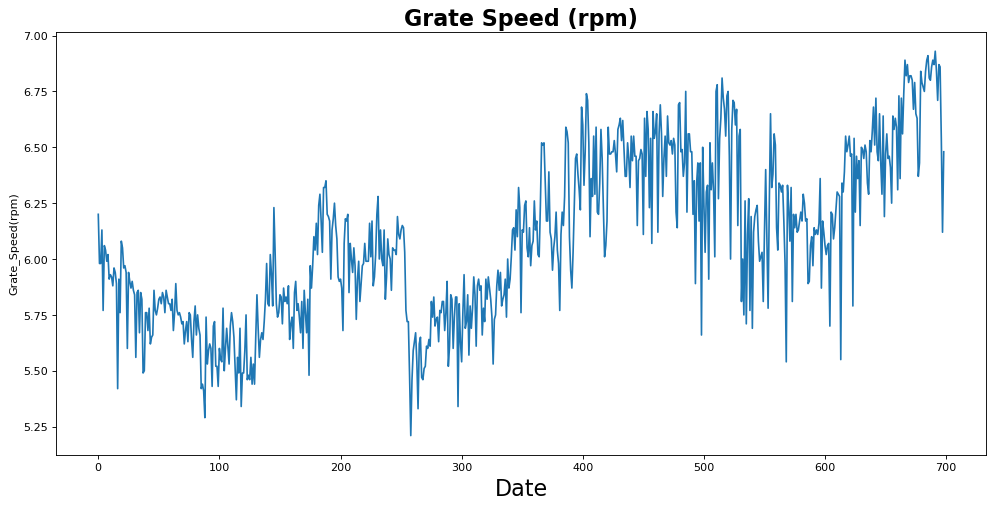

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 2019-03-22 to 2022-02-22
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Blane_before_hpgr   699 non-null    float64
 1   Blane_after_hpgr    699 non-null    float64
 2   MC%                 699 non-null    float64
 3   Drop                699 non-null    float64
 4   710FN3_Damper(%)    699 non-null    float64
 5   Water_Mix1(m3-h)    699 non-null    float64
 6   Water_Mix2(m3-h)    699 non-null    float64
 7   Water_Mixer_Total   699 non-null    float64
 8   Killn_Speed(rpm)    699 non-null    float64
 9   TG_Zone1_Temp(deg)  699 non-null    float64
 10  710FN1_Damper(%)    699 non-null    float64
 11  730FN1_Damper(%)    699 non-null    float64
 12  Grate_Feed(ton)     699 non-null    float64
 13  OffGas(deg)         699 non-null    float64
 14  WF5(t-h)            699 non-null    float64
 15  WF6(t-h)            699 non-null    float64
 1

In [66]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Grate Speed (rpm)', fontsize=20,fontweight='bold')
f=sns.lineplot(x=range(len(df)), y=df['Grate_Speed(rpm)'], data=df )
f.set_xlabel("Date", fontsize = 20)
plt.show()
df.info()

In [67]:
col=df.columns
data=df.values
idx=df.index.values

In [68]:
iso = IsolationForest()
yhat = iso.fit_predict(data)
yhat.shape

(699,)

In [69]:
# select all rows that are not outliers
mask = yhat != -1
mask.shape

(699,)

In [70]:
data = data[mask, :]
idx = idx[mask]

In [71]:
df=pd.DataFrame(data,columns=col,index=idx)
df

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3-h),Water_Mix2(m3-h),Water_Mixer_Total,Killn_Speed(rpm),TG_Zone1_Temp(deg),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t-h),WF6(t-h),Wf5&6_total,Grate_Speed(rpm),FeO,P_9-16_mm
2019-03-22,1664.166667,1944.333333,9.068056,4.198194,34.56,3.77,2.85,6.62,1.72,215.62,51.00,32.50,12383.61,827.97,14.54,19.03,33.57,6.20,0.721667,86.938333
2019-03-23,1664.307692,2014.000000,8.997183,4.894366,34.01,5.68,2.77,8.45,1.72,218.05,51.98,31.96,12413.71,847.22,17.42,16.49,33.91,5.98,0.786667,87.138333
2019-03-24,1640.000000,2036.909091,8.795833,4.649583,28.01,5.07,3.07,8.14,1.72,227.96,46.90,31.49,12277.02,844.50,17.58,18.08,35.66,5.98,0.660000,86.723333
2019-03-26,1640.090909,2034.181818,9.001493,5.343582,34.39,4.49,4.48,8.97,1.72,223.18,48.12,32.16,12960.56,805.14,17.68,17.76,35.44,6.13,0.853333,88.649167
2019-03-28,1593.916667,1998.500000,8.850000,4.608088,38.36,3.44,3.23,6.67,1.72,232.53,46.31,31.87,12608.12,844.28,18.81,17.56,36.37,5.77,0.750833,87.730833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,1499.666667,1709.000000,9.085333,3.870400,48.05,1.89,1.89,3.78,1.55,216.81,64.39,48.37,13747.90,901.87,20.92,21.44,42.36,6.93,0.676154,92.163077
2022-02-09,1514.545455,1713.454545,8.884932,3.880411,49.15,2.12,2.17,4.29,1.55,219.84,60.27,49.38,13558.50,910.09,23.10,23.82,46.92,6.71,0.868333,92.193333
2022-02-10,1494.000000,1709.181818,9.076316,4.152368,45.24,2.89,2.90,5.79,1.55,211.68,63.20,48.38,13881.80,899.18,21.14,21.21,42.35,6.87,0.735000,92.317500
2022-02-11,1489.500000,1684.250000,9.071622,4.112162,47.37,2.58,2.56,5.14,1.55,214.70,63.04,48.76,13838.00,894.06,20.88,20.90,41.78,6.86,0.746667,91.197500


In [72]:
len(df)

646

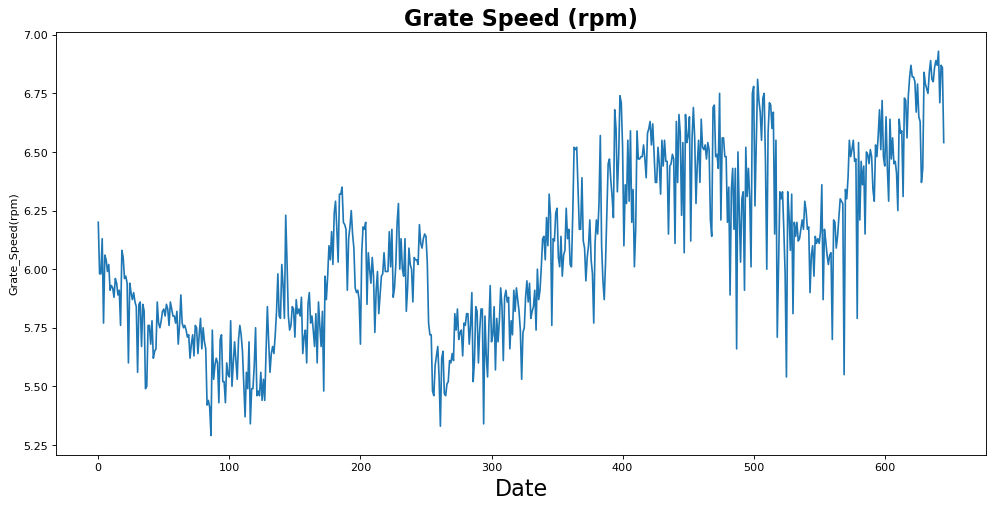

In [73]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Grate Speed (rpm)', fontsize=20,fontweight='bold')
f=sns.lineplot(x=range(len(df)), y=df['Grate_Speed(rpm)'], data=df )
f.set_xlabel("Date", fontsize = 20)

plt.show()

In [74]:
df.describe()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3-h),Water_Mix2(m3-h),Water_Mixer_Total,Killn_Speed(rpm),TG_Zone1_Temp(deg),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t-h),WF6(t-h),Wf5&6_total,Grate_Speed(rpm),FeO,P_9-16_mm
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,1636.455495,1933.397887,9.049394,4.330353,43.661254,3.384071,3.442183,6.826254,1.639598,221.613854,54.769365,38.311254,12920.883947,852.735248,16.477895,16.710557,33.188452,6.075449,0.878324,87.249472
std,126.540451,130.117564,0.176189,0.534816,4.500529,1.088000,1.177840,2.230757,0.073673,12.742716,5.394997,4.718715,442.963986,46.280081,5.508816,5.425178,10.795210,0.367673,0.287222,2.017039
min,1280.363636,1644.600000,8.601389,2.943273,28.010000,0.540000,0.400000,0.940000,1.440000,186.300000,23.950000,31.370000,12006.020000,640.790000,0.000000,0.000000,0.000000,5.290000,0.386667,81.032500
25%,1530.643939,1833.727273,8.932066,3.982038,41.367500,2.670000,2.680000,5.330000,1.570000,211.160000,51.000000,35.822500,12619.775000,816.870000,13.480000,13.695000,27.842500,5.780000,0.679375,85.902292
50%,1643.958333,1918.727273,9.041381,4.301773,44.925000,3.440000,3.435000,6.875000,1.660000,221.700000,54.775000,36.760000,12912.010000,853.425000,17.600000,17.645000,35.095000,6.040000,0.820000,87.292500
75%,1734.979167,2017.840909,9.168812,4.656250,46.987500,4.157500,4.237500,8.377500,1.700000,230.330000,58.480000,37.837500,13197.505000,886.650000,20.320000,20.365000,40.765000,6.360000,0.998333,88.493958
max,1918.300000,2288.666667,9.681429,6.497568,53.210000,6.380000,7.390000,12.930000,1.780000,256.430000,69.780000,50.480000,13995.260000,973.740000,28.200000,27.980000,55.460000,6.930000,2.739286,93.422500


In [75]:
df['Pellet_Feo'] = np.where(df['FeO'] <= 0.5 ,'Very Good', None)
df['Pellet_Feo'] = np.where(((df['FeO'] <= 0.8)&(df['FeO'] > 0.5)) ,'Good', df['Pellet_Feo'])
df['Pellet_Feo'] = np.where(((df['FeO'] <= 1.2)&(df['FeO'] > 0.8)) ,'Not Bad', df['Pellet_Feo'])
df['Pellet_Feo'] = np.where(df['FeO'] > 1.2 ,'Bad', df['Pellet_Feo'])

In [76]:
df.head()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3-h),Water_Mix2(m3-h),Water_Mixer_Total,Killn_Speed(rpm),TG_Zone1_Temp(deg),...,730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t-h),WF6(t-h),Wf5&6_total,Grate_Speed(rpm),FeO,P_9-16_mm,Pellet_Feo
2019-03-22,1664.166667,1944.333333,9.068056,4.198194,34.56,3.77,2.85,6.62,1.72,215.62,...,32.50,12383.61,827.97,14.54,19.03,33.57,6.20,0.721667,86.938333,Good
2019-03-23,1664.307692,2014.000000,8.997183,4.894366,34.01,5.68,2.77,8.45,1.72,218.05,...,31.96,12413.71,847.22,17.42,16.49,33.91,5.98,0.786667,87.138333,Good
2019-03-24,1640.000000,2036.909091,8.795833,4.649583,28.01,5.07,3.07,8.14,1.72,227.96,...,31.49,12277.02,844.50,17.58,18.08,35.66,5.98,0.660000,86.723333,Good
2019-03-26,1640.090909,2034.181818,9.001493,5.343582,34.39,4.49,4.48,8.97,1.72,223.18,...,32.16,12960.56,805.14,17.68,17.76,35.44,6.13,0.853333,88.649167,Not Bad
2019-03-28,1593.916667,1998.500000,8.850000,4.608088,38.36,3.44,3.23,6.67,1.72,232.53,...,31.87,12608.12,844.28,18.81,17.56,36.37,5.77,0.750833,87.730833,Good


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, 2019-03-22 to 2022-02-12
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Blane_before_hpgr   646 non-null    float64
 1   Blane_after_hpgr    646 non-null    float64
 2   MC%                 646 non-null    float64
 3   Drop                646 non-null    float64
 4   710FN3_Damper(%)    646 non-null    float64
 5   Water_Mix1(m3-h)    646 non-null    float64
 6   Water_Mix2(m3-h)    646 non-null    float64
 7   Water_Mixer_Total   646 non-null    float64
 8   Killn_Speed(rpm)    646 non-null    float64
 9   TG_Zone1_Temp(deg)  646 non-null    float64
 10  710FN1_Damper(%)    646 non-null    float64
 11  730FN1_Damper(%)    646 non-null    float64
 12  Grate_Feed(ton)     646 non-null    float64
 13  OffGas(deg)         646 non-null    float64
 14  WF5(t-h)            646 non-null    float64
 15  WF6(t-h)            646 non-null    float64
 1

In [78]:
#df.to_csv('Feo_analysis_data.csv',index_label = 'Date')

In [79]:
df['Pellet_Feo'].unique()

array(['Good', 'Not Bad', 'Very Good', 'Bad'], dtype=object)